In [1]:
import os
os.chdir("../..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fix_data import add_label_T
import sklearn.feature_selection as fs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding

In [4]:
hcc_smarts_df_train = pd.read_csv("data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep = " ")
mcf_smarts_df_train = pd.read_csv("data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep= " ")

hcc_smarts_df_train = add_label_T(hcc_smarts_df_train)
mcf_smarts_df_train = add_label_T(mcf_smarts_df_train)

X1 = hcc_smarts_df_train.loc[:,hcc_smarts_df_train.columns!='label']
X2 = mcf_smarts_df_train.loc[:,mcf_smarts_df_train.columns!='label']
y = hcc_smarts_df_train["label"]

### PCA 2 Components

0.47120179743014534


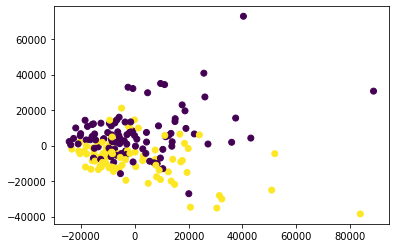

In [5]:
pca = PCA(n_components=2)
pca.fit(X1)

print(sum(pca.explained_variance_ratio_))
red_X1 = pd.DataFrame(pca.transform(X1))
plt.scatter(red_X1[0], red_X1[1], c=y)

In [6]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=5, coef0=1, C=1))
poly_kernel_svm_clf.fit(red_X1, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, red_X1, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 76.2573%
[0.78947368 0.94736842 0.66666667 0.88888889 0.88888889 0.72222222
 0.66666667 0.66666667 0.72222222 0.66666667]


### Multidimensional Scaling (MDS)
reduces dimensionality while trying to preserve
the distances between the instances.

c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


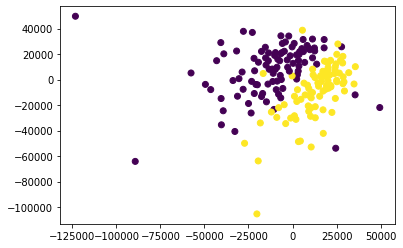

In [8]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X1)
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:,1], c=y)

In [27]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=6, coef0=1, C=1))
poly_kernel_svm_clf.fit(X_reduced_mds, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_reduced_mds, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 94.0058%
[0.89473684 0.89473684 1.         0.94444444 1.         0.94444444
 0.88888889 0.83333333 1.         1.        ]


### Isomap 
creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

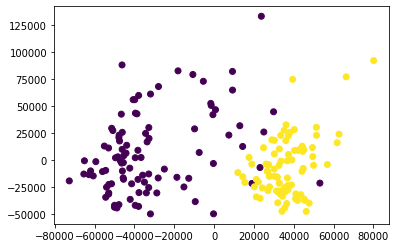

In [28]:
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X1)
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:,1], c=y)

In [47]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=3, coef0=1, C=100))
poly_kernel_svm_clf.fit(X_reduced_isomap, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_reduced_isomap, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 97.8655%
[0.89473684 0.94736842 1.         1.         1.         1.
 1.         1.         0.94444444 1.        ]


### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).

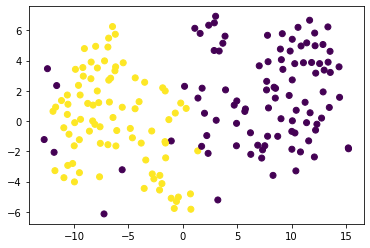

In [48]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X1)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=y)

In [56]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=3, coef0=1, C=100))
poly_kernel_svm_clf.fit(X_reduced_tsne, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_reduced_tsne, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 94.5906%
[0.84210526 0.89473684 1.         1.         1.         0.94444444
 1.         0.94444444 0.88888889 0.94444444]


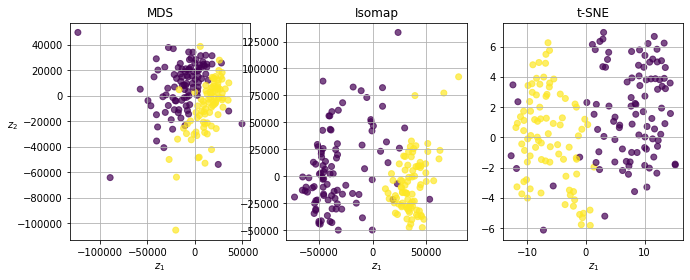

In [24]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

### Locally Linear Embedding

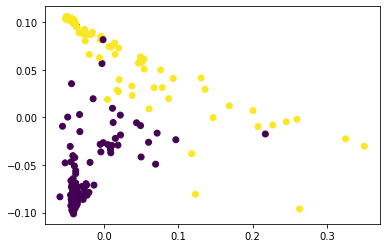

In [57]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=8, random_state=42)
X_unrolled = lle.fit_transform(X1)
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=y)

In [70]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=7, coef0=1, C=1))
poly_kernel_svm_clf.fit(X_unrolled, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_unrolled, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 96.7836%
[0.89473684 0.89473684 1.         1.         1.         1.
 1.         0.94444444 0.94444444 1.        ]


### Kernel PCA Rbf

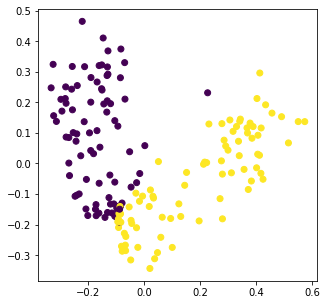

In [71]:
rbf_pca = KernelPCA(kernel="rbf", gamma=0.000000003, coef0=1)
plt.figure(figsize=(5, 5))

rbf_pca.n_components = 2
rbf_pca.random_state = 42
X_reduced = rbf_pca.fit_transform(X1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1)


In [ ]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=3, coef0=1, C=100))
poly_kernel_svm_clf.fit(X_reduced_isomap, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_reduced_isomap, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

### Sigmoid Kernel

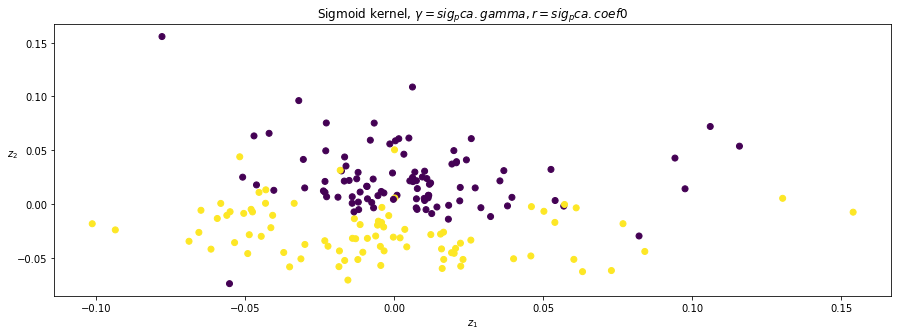

In [87]:
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.000000001, coef0=1)
plt.figure(figsize=(15, 5))

sig_pca.n_components = 2
sig_pca.random_state = 42
X_reduced = sig_pca.fit_transform(X1)


plt.title("Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.show()

In [84]:
## POLY KERNEL SVM

poly_kernel_svm_clf = make_pipeline(SVC(kernel="poly", degree=6, coef0=1, C=100))
poly_kernel_svm_clf.fit(X_reduced_isomap, y)

poly_rmse = cross_val_score(poly_kernel_svm_clf, X_reduced_isomap, y,
                              scoring="accuracy", cv=10)
print(f"Accuracy = {round((sum(poly_rmse) / 10) * 100, 4)}%")
print(poly_rmse)

Accuracy = 96.7544%
[0.89473684 0.94736842 1.         0.94444444 1.         1.
 1.         1.         0.88888889 1.        ]
